# Exercise 2b: Arithmetic and Aggregation

## Aim: Learn to do computation with xarray

Find the teaching materials here: https://tutorial.xarray.dev/fundamentals/03.1_computation_with_xarray.html

### Issues covered: 
- Doing arithmetic on data arrays
- Using `.mean()`, `.std()`, `.max()` and `.min()`

Q1. Import the `'../data/xbhubo.pgc0apr.nc'` dataset and create the temperature data array as in the last lesson.

In [1]:
import xarray as xr
ds = xr.open_dataset('../data/xbhubo.pgc0apr.nc')
temperature = ds["temp"]

Q2. Let's compare the data between the sea surface and further down. Create two temperature datasets and extract the temperature change data the sea surface and the sea bottom

In [2]:
surface = temperature.isel(depth=0).squeeze()
bottom = temperature.isel(depth=-1).squeeze()
print(surface.shape)
print(bottom.shape)

(144, 288)
(144, 288)


Q3. Calculate the difference in temperature the bottom of the ocean and the surface.

In [3]:
delta_temp = bottom - surface
delta_temp

<xarray.DataArray 'temp' (latitude: 144, longitude: 288)> Size: 166kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude   (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
    t          object 8B 1920-04-16 00:00:00

Q4. Plot the difference in these temperatures using xarrays built-in features.

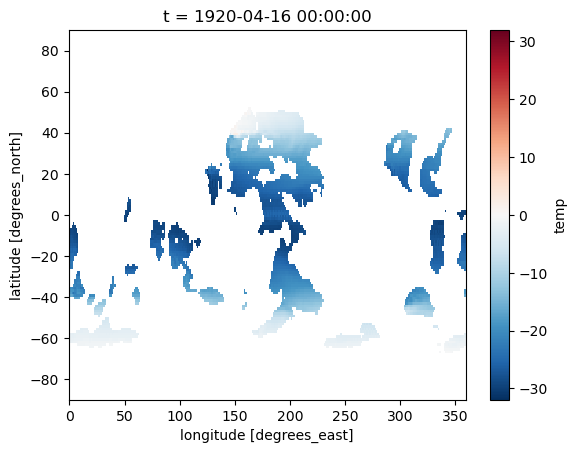

In [4]:
delta_temp.plot()

Q5. Calculate the **minimum** temperature across the water depth in all locations.

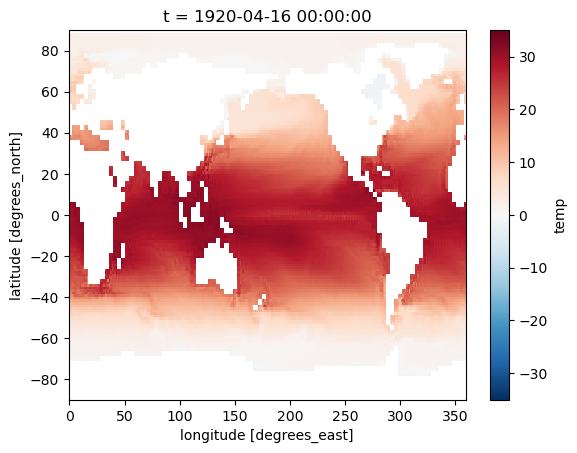

In [5]:
temperature.max(dim='depth').plot()

Q6. Compute the global average ocean temperature change (averaged over all depths) for the entire time period in the dataset. Then display the result as a 2D depth profile.

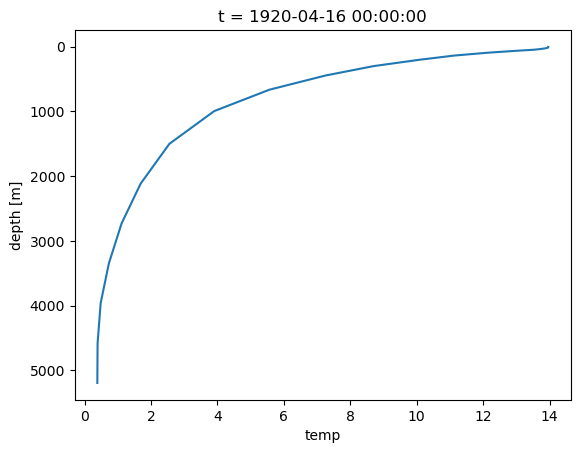

In [6]:
import matplotlib.pyplot as plt
global_avg_temp = temperature.mean(dim=['latitude', 'longitude'])
global_avg_temp.plot(y='depth')
plt.gca().invert_yaxis()

Q7. Calculate the zonal average temperature change for each latitude. Plot the result as a 2d contour with depth on the y axis and latitude on x.

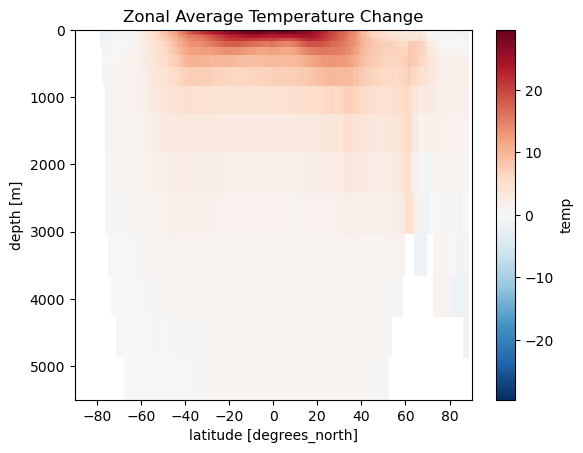

In [7]:
zonal_avg_temp = temperature.mean(dim=['longitude'])
zonal_avg_temp.plot()
plt.title('Zonal Average Temperature Change')
plt.gca().invert_yaxis()